# 1. Definition
A **multi-class classification** is a *classification technique that allows us to categorize data* with **more than two class labels.**

**Logistic regression** is a statistical method used for **binary classification,** which predicts the probability that a given input belongs to **one of two possible categories.** When dealing with **multiclass classification,** where there are **more than two classes,** logistic regression can be extended using techniques such as:

### A. One-vs-Rest (OvR) or One-vs-All (OvA):
* This approach involves training a **separate binary classifier for each class.** <br>
* For **each classifier, one class is treated as the positive class,** and all **other classes are treated as the negative class.**
* During prediction, the **class with the highest probability** is chosen as the final prediction.

### B. Multinomial Logistic Regression:
* Also known as **Softmax Regression,** this approach generalizes logistic regression to handle multiple classes directly.
* Instead of using a **single sigmoid function,** it uses the **softmax function** to **predict the probabilities of each class.**
* The **softmax function** ensures that the **sum of the predicted probabilities for all classes is equal to 1.**


**Thanks To:**
* [Optical Recognition of Handwritten Digits](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)
* [*sklearn.datasets*.**load_digits**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
* [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

# 2. Import libraries

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# 3. Load dataset

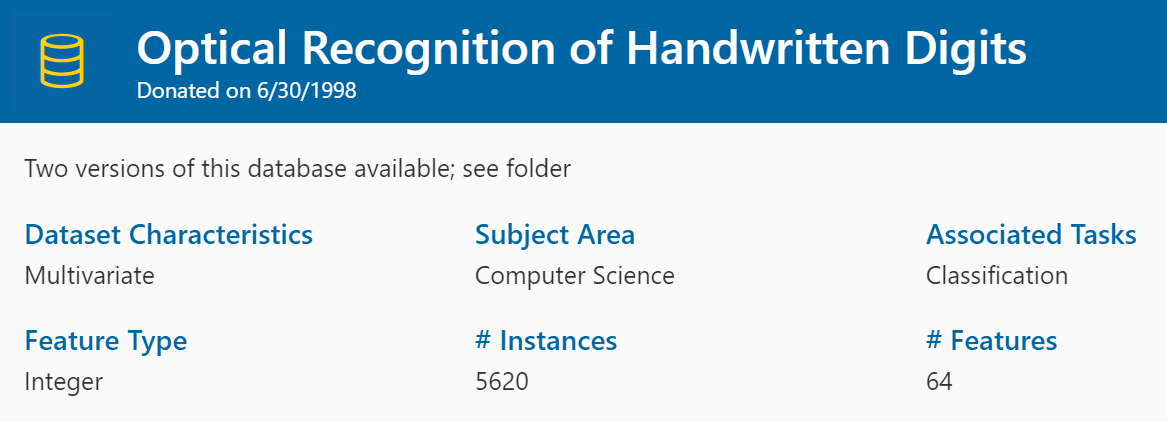

### Each datapoint is a 8x8 image of a digit.
##### from pixel_0_0 to pixel_0_7 like that
##### pixel_1_0 to pixel_1_7
#####. . .
##### pixel_7_0 to pixel_7_7

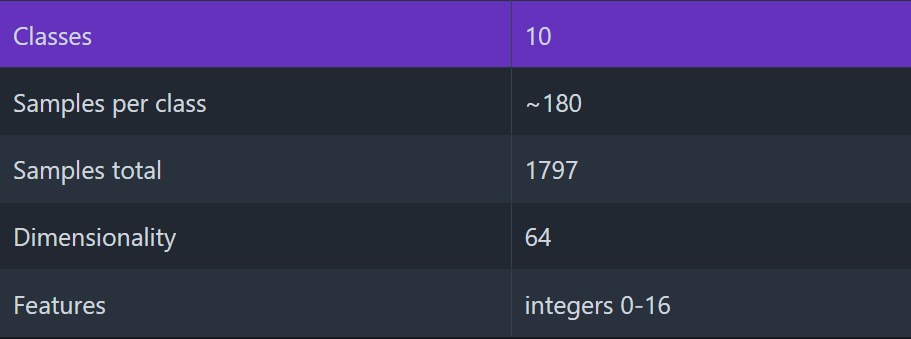

In [2]:
# load hand written digit dataset from sklearn library
digits = load_digits()
# read all the attributes of digit dataset
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

# 4. Dataset EDA (Exploratory Data Analysis)

In [3]:
# number of features in the digit dataset
len(digits.feature_names)

64

In [4]:
# feature's length (number of instances) of the dataset
len(digits.data)

1797

In [5]:
# target's length of the dataset
len(digits.target)

1797

In [6]:
# number of categories (multi-class) in the target
len(digits.target_names)

10

In [7]:
# different categories (multi-class) of the target
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 5. Data Visualization

Visualize the first 3 images of hand written digit dataset. The target attribute of the dataset stores <br>the digit image represents and this is included in the title of the 3 plots below.

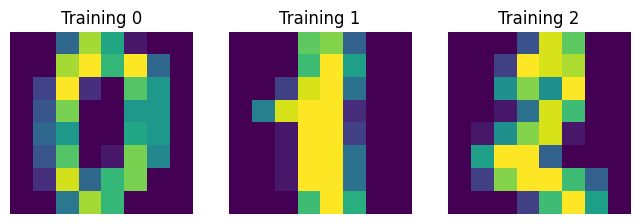

In [8]:
%matplotlib inline
# for i in range(3):
#   plt.matshow(digits.images[i])

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

for ax, img, label in zip(ax, digits.images, digits.target):
  ax.set_axis_off()
  # ax.imshow(img, cmap=plt.cm.gray, interpolation='nearest')     # gray colormap in a matplotlib subplot
  ax.imshow(img, cmap='viridis', interpolation='nearest')       # colorful colormap in a matplotlib subplot
  ax.set_title("Training %i" % label)

In [9]:
# plt.gray()
# for i in range(3):
#   plt.matshow(digits.images[i])

In [10]:
# verify the first 3 target attribute from digit dataset
digits.target[0:3]

array([0, 1, 2])

In [11]:
# the first 3 target attribute class from digit dataset
digits.target_names[0:3]

array([0, 1, 2])

# 6. Split dataset into train and test data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# split the digit dataset into training and test dataset.
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [14]:
# length of independent training dataset variables
len(X_train)

1347

In [15]:
# length of dependent training dataset variables
len(X_test)

450

# 7. Logistic Regression model creation

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The warning you're seeing indicates that the Logistic Regression model in scikit-learn did not converge within the default number of iterations. Here are some steps you can take to resolve this issue:

#### 1. Increase the Number of Iterations:
You can increase the max_iter parameter, which sets the maximum number of iterations for the solver to converge.
```
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)  # Increase the number of iterations
model.fit(X, y)
```
#### 2. Scale the Data:
Scaling your data can improve convergence. Standardizing features by removing the mean and scaling to unit variance can help. You can use StandardScaler from scikit-learn for this purpose.
```
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
model = LogisticRegression(max_iter=200)
pipeline = make_pipeline(scaler, model)

pipeline.fit(X, y)
```
#### 3. Try Different Solvers:
You can try using different solvers like 'liblinear', 'saga', or 'newton-cg'. Different solvers have different strengths and might perform better depending on your data.
```
model = LogisticRegression(solver='liblinear')  # Try a different solver
model.fit(X, y)
```
#### 4. Refer to Documentation:
For more details, you can refer to the [scikit-learn documentation.](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
<br>
By applying one or a combination of these steps, you should be able to resolve the convergence warning.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
model = LogisticRegression(max_iter=200)
pipeline = make_pipeline(scaler, model)

# train the model by using training digit dataset
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=200))])

In [18]:
# length of validation digit dataset
len(model.predict(X_test))

450

# 8. Data Validation

In [19]:
# validation accuracy score of digit dataset
model.score(X_test, y_test)

0.8066666666666666

## 8.1 Build the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) showing the main classification metrics.

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(
    f"\nAccuracy Score:     {accuracy_score(y_test, model.predict(X_test))}\n",
    f"\nClassification Report:\n{classification_report(y_test, model.predict(X_test))}\n",
)


Accuracy Score:     0.8066666666666666
 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.49      1.00      0.66        43
           2       0.94      0.98      0.96        45
           3       1.00      0.60      0.75        48
           4       1.00      0.24      0.39        46
           5       1.00      0.77      0.87        53
           6       0.79      0.97      0.87        39
           7       1.00      0.78      0.87        40
           8       0.81      0.83      0.82        42
           9       0.62      0.95      0.75        38

    accuracy                           0.81       450
   macro avg       0.87      0.81      0.79       450
weighted avg       0.88      0.81      0.80       450




In [21]:
model.predict([digits.data[2]])

array([1])

In [22]:
model.predict(digits.data[0:3])

array([0, 1, 1])

## 8.2 Prediction of digit dataset

In [23]:
# prediction of validation digit dataset
y_pred = model.predict(X_test)

# 9. Model (Data) Evaluation
## 9.1 Confusion matrix
Plot a [confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) of the **true digit** values and the **predicted digit** values.

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## 9.2 Seaborn
**Seaborn** is a library for making statistical graphics in Python. It builds on top of **matplotlib** and integrates closely with **pandas data structures**.

In [25]:
import seaborn as sb

## 9.3 Confusion Matrix
A confusion matrix is a useful tool for evaluating the accuracy performance of a **classification model.**

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3, 29,  0,  0,  0,  0,  5, 11],
       [ 0, 24,  0,  0, 11,  0,  9,  0,  1,  1],
       [ 0,  4,  0,  0,  0, 41,  1,  0,  0,  7],
       [ 0,  1,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0, 31,  2,  2],
       [ 0,  6,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0, 36]])

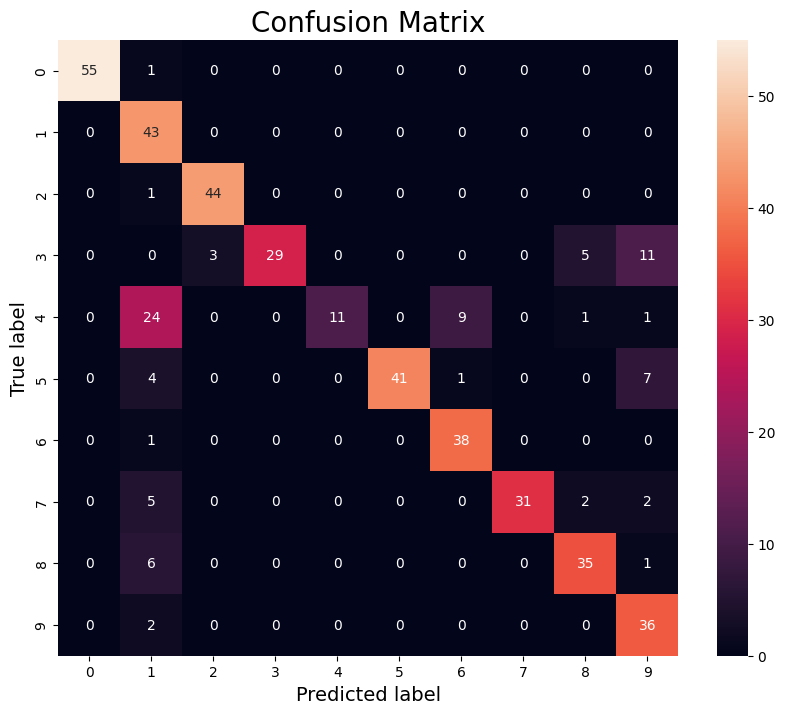

In [27]:
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

## 9.4 ConfusionMatrixDisplay
Combination of **confusion matrix** and **seaborn** library in a single plot.

Confusion matrix:
[[55  1  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  1 44  0  0  0  0  0  0  0]
 [ 0  0  3 29  0  0  0  0  5 11]
 [ 0 24  0  0 11  0  9  0  1  1]
 [ 0  4  0  0  0 41  1  0  0  7]
 [ 0  1  0  0  0  0 38  0  0  0]
 [ 0  5  0  0  0  0  0 31  2  2]
 [ 0  6  0  0  0  0  0  0 35  1]
 [ 0  2  0  0  0  0  0  0  0 36]]


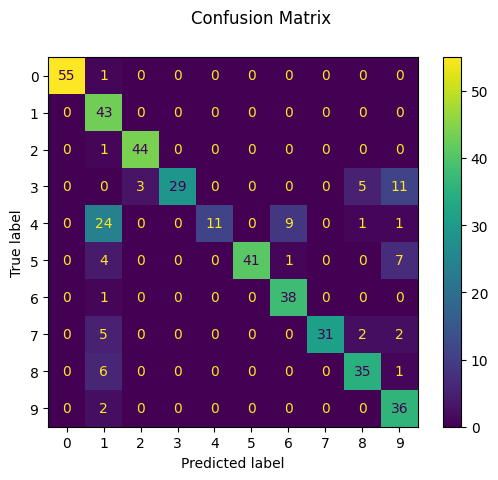

In [28]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()